# Importing Libraries

In [6]:
import pandas as pd
from tabulate import tabulate
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset

In [7]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# **Data Preprocessing**

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Dealing With Missing Values

In [9]:
# Drop rows with missing streams (target variable to predict)
df = df[pd.to_numeric(df['streams'], errors='coerce').notnull()]
if pd.api.types.is_object_dtype(df['in_deezer_playlists']):
   df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(',', '').astype(int)
if pd.api.types.is_object_dtype(df['in_shazam_charts']):
	df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(',', '')
if pd.api.types.is_object_dtype(df['streams']):
	df["streams"] = df["streams"].astype(int)

# Impute missing values in in_shazam_charts column
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0).astype(int)

# Combine all playlist and chart counts into single columns
df['in_playlists'] = df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists']
df['in_charts'] = df['in_spotify_charts'] + df['in_apple_charts'] + df['in_deezer_charts'] + df['in_shazam_charts']

# Impute missing key values
mode_key = df['key'].mode()[0]
# Create new column to indicate whether key was imputed
df['key_imputed'] = np.where(df['key'].isnull(), 1, 0)
df['key'].fillna(mode_key, inplace=True)

df.isna().sum()


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
in_playlists            0
in_charts               0
key_imputed             0
dtype: int64

## Consolidating outliers

In [10]:
# Delete duplicate tracks
df[df.duplicated(subset=['track_name', 'artist(s)_name'], keep=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_playlists,in_charts,key_imputed
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,56,53,64,11,0,45,6,3576,122,1
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,73,65,79,5,2,11,6,670,17,0
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,84,72,74,10,0,34,7,2357,2,0
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,70,57,57,9,20,11,7,592,24,0
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,70,35,77,1,0,26,4,2652,80,0
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,75,53,74,2,0,11,5,6910,73,0
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,84,72,74,10,0,34,7,9535,94,0
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,56,52,64,11,0,45,7,1884,353,1


In [11]:
# Combine duplicate tracks
duplicate_tracks = df[df.duplicated(subset=['track_name', 'artist(s)_name'], keep=False)].track_name.unique()
for track in duplicate_tracks:
    # Sum all streams, playlists and charts for same tracks
    for col in ['streams', 'in_playlists', 'in_charts']:
        df.loc[df.track_name == track, col] = df.loc[df.track_name == track, col].sum()
    # Use mean for all audio features
    for col in ['danceability_%', 'energy_%', 'valence_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%']:
        df.loc[df.track_name == track, col] = df.loc[df.track_name == track, col].mean().astype(int)
        

df.drop_duplicates(subset=['track_name', 'artist(s)_name'], inplace=True)


In [12]:
df[df.duplicated(subset=['track_name', 'artist(s)_name'], keep=False)]


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_playlists,in_charts,key_imputed


danceability_% 3
valence_% 0
energy_% 4
acousticness_% 0
instrumentalness_% 86
liveness_% 52
speechiness_% 136


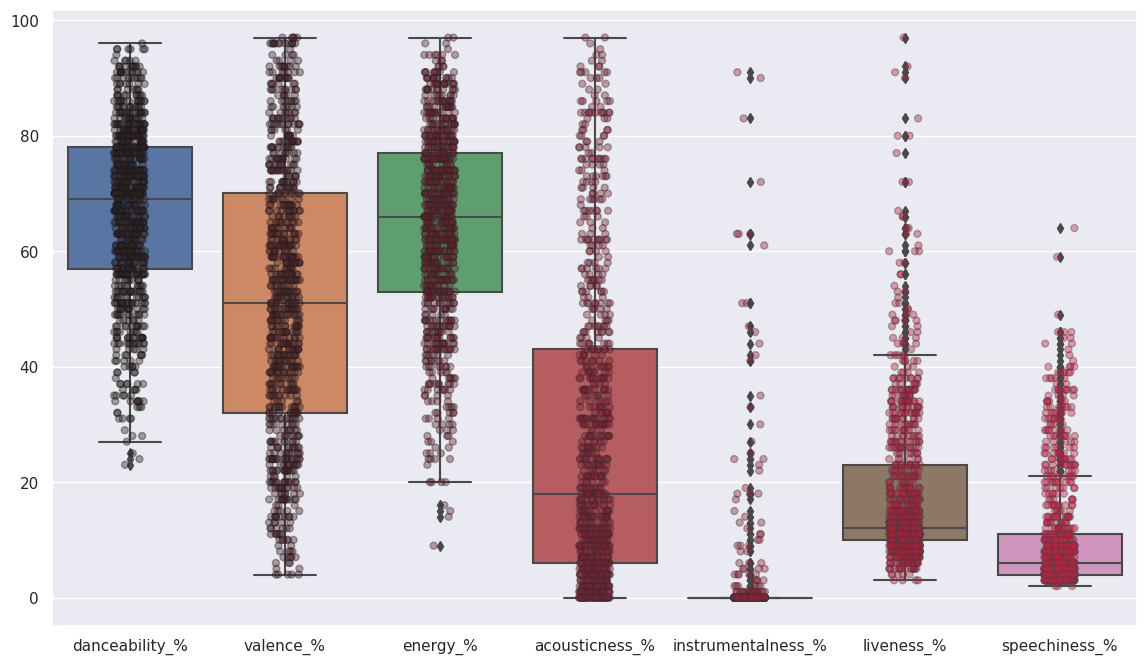

In [13]:
# Find IRQ 1.5 outliers
columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
threshold = 1.5
for column in columns:
	Q1 = df[column].quantile(0.25)
	Q3 = df[column].quantile(0.75)
	IQR = Q3 - Q1
	outliers = df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)]
	print(column, outliers.shape[0])

plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")
sns.boxplot(data=df[columns])

sns.stripplot(data=df[columns],
			palette='dark:crimson', linewidth = 1, alpha = 0.4)
plt.show()

In [14]:
df.sample(20)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_playlists,in_charts,key_imputed
597,Thunder,"Prezioso, Gabry Ponte, LUM!X",3,2021,5,7,4846,10,422691058,54,...,67,40,90,3,0,34,6,5159,39,0
602,The Feels,TWICE,1,2021,10,1,1150,0,345903614,20,...,81,92,90,9,0,8,7,1214,101,0
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,81,56,48,21,0,8,33,3068,506,0
216,Escapism.,"RAYE, 070 Shake",2,2022,10,12,5129,25,532336353,116,...,54,25,74,14,0,9,11,5359,475,0
87,Me Porto Bonito,"Chencho Corleone, Bad Bunny",2,2022,5,6,8870,43,1440757818,104,...,91,43,71,9,0,9,8,9115,238,0
888,Mary On A Cross,Ghost,1,2019,9,13,2668,2,387080183,38,...,47,56,90,0,0,10,4,2784,409,0
709,Nail Tech,Jack Harlow,1,2022,2,18,2939,0,193443895,42,...,65,11,58,0,0,12,9,3005,0,0
330,Low,SZA,1,2022,12,9,1911,0,272377463,23,...,70,34,55,43,0,16,6,1948,80,1
105,Primera Cita,Carin Leon,1,2022,4,20,266,27,77309611,6,...,54,50,40,61,0,10,6,278,275,0
920,BABY OTAKU,"Fran C, Polima WestCoast, Nickoog Clk, Pablito...",4,2022,8,18,836,0,159240673,14,...,84,43,75,5,0,6,8,863,1,0


## Keeping only useful columns

In [15]:
df = df[[
	"streams", 	
	"in_playlists",
	"in_charts",
	"bpm",
	"key",
	"key_imputed",
	"mode",
	"danceability_%",
	"valence_%",
	"energy_%",
	"acousticness_%",
	"instrumentalness_%",
	"liveness_%",
	"speechiness_%"
]]

df.head()


,streams,in_playlists,in_charts,bpm,key,key_imputed,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,641,1246,125,B,0,Major,80,89,83,31,0,8,4
1,133716286,1580,570,92,C#,0,Major,71,61,74,7,0,10,4
2,140003974,1582,1283,138,F,0,Major,51,32,53,17,0,31,6
3,800840817,8099,867,170,A,0,Major,55,58,72,11,0,11,15
4,303236322,3304,623,144,A,0,Minor,65,23,80,14,63,11,6


## Categorizing the data

In [16]:
categorical_df = df.copy()
# Equal width binning
columns = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
for column in columns:
	categorical_df[column + "_binned"] = pd.cut(x=categorical_df[column + "_%"], bins=5, labels=['low','bellow_average','average','above_average','high'])

categorical_df.head()


,streams,in_playlists,in_charts,bpm,key,key_imputed,mode,danceability_%,valence_%,energy_%,...,instrumentalness_%,liveness_%,speechiness_%,danceability_binned,valence_binned,energy_binned,acousticness_binned,instrumentalness_binned,liveness_binned,speechiness_binned
0,141381703,641,1246,125,B,0,Major,80,89,83,...,0,8,4,above_average,high,high,bellow_average,low,low,low
1,133716286,1580,570,92,C#,0,Major,71,61,74,...,0,10,4,above_average,above_average,above_average,low,low,low,low
2,140003974,1582,1283,138,F,0,Major,51,32,53,...,0,31,6,bellow_average,bellow_average,average,low,low,bellow_average,low
3,800840817,8099,867,170,A,0,Major,55,58,72,...,0,11,15,average,average,above_average,low,low,low,bellow_average
4,303236322,3304,623,144,A,0,Minor,65,23,80,...,63,11,6,average,bellow_average,high,low,above_average,low,low


In [17]:
# Equal frequency binning
columns = ["streams", "in_playlists", "in_charts", "bpm"]

for column in columns:
	categorical_df[column + "_binned"] = pd.qcut(categorical_df[column], 10, labels=False, retbins=True)[0]
categorical_df.head()


,streams,in_playlists,in_charts,bpm,key,key_imputed,mode,danceability_%,valence_%,energy_%,...,valence_binned,energy_binned,acousticness_binned,instrumentalness_binned,liveness_binned,speechiness_binned,streams_binned,in_playlists_binned,in_charts_binned,bpm_binned
0,141381703,641,1246,125,B,0,Major,80,89,83,...,high,high,bellow_average,low,low,low,2,1,9,5
1,133716286,1580,570,92,C#,0,Major,71,61,74,...,above_average,above_average,low,low,low,low,2,3,9,1
2,140003974,1582,1283,138,F,0,Major,51,32,53,...,bellow_average,average,low,low,bellow_average,low,2,3,9,7
3,800840817,8099,867,170,A,0,Major,55,58,72,...,average,above_average,low,low,low,bellow_average,7,8,9,9
4,303236322,3304,623,144,A,0,Minor,65,23,80,...,bellow_average,high,low,above_average,low,low,5,6,9,7


In [18]:
categorical_df = categorical_df[[
	"streams_binned", 	
	"in_playlists_binned",
	"in_charts_binned",
	"bpm_binned",
	"key",
	"key_imputed",
	"mode",
	"danceability_binned",
	"valence_binned",
	"energy_binned",
	"acousticness_binned",
	"instrumentalness_binned",
	"liveness_binned",
	"speechiness_binned"
]]

categorical_df.head()


,streams_binned,in_playlists_binned,in_charts_binned,bpm_binned,key,key_imputed,mode,danceability_binned,valence_binned,energy_binned,acousticness_binned,instrumentalness_binned,liveness_binned,speechiness_binned
0,2,1,9,5,B,0,Major,above_average,high,high,bellow_average,low,low,low
1,2,3,9,1,C#,0,Major,above_average,above_average,above_average,low,low,low,low
2,2,3,9,7,F,0,Major,bellow_average,bellow_average,average,low,low,bellow_average,low
3,7,8,9,9,A,0,Major,average,average,above_average,low,low,low,bellow_average
4,5,6,9,7,A,0,Minor,average,bellow_average,high,low,above_average,low,low


## Encoding categories and normalization

In [19]:
numerical_df = df.copy()

# Encode key and mode columns using ordinal encoding
encoder = preprocessing.OrdinalEncoder()
numerical_df[['key', 'mode']] = encoder.fit_transform(numerical_df[['key', 'mode']])
numerical_df.head()


,streams,in_playlists,in_charts,bpm,key,key_imputed,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,641,1246,125,2.0,0,0.0,80,89,83,31,0,8,4
1,133716286,1580,570,92,3.0,0,0.0,71,61,74,7,0,10,4
2,140003974,1582,1283,138,7.0,0,0.0,51,32,53,17,0,31,6
3,800840817,8099,867,170,0.0,0,0.0,55,58,72,11,0,11,15
4,303236322,3304,623,144,0.0,0,1.0,65,23,80,14,63,11,6


In [20]:
# Scale all percentage columns to range [0, 1]
scaler = preprocessing.MinMaxScaler()
numerical_df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']] = scaler.fit_transform(numerical_df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']])

# Scale all numerical columns to mean 0 and standard deviation 1 using standard scaling
scaler = preprocessing.StandardScaler()
numerical_df[['streams', 'in_playlists', 'in_charts', 'bpm']] = scaler.fit_transform(numerical_df[['streams', 'in_playlists', 'in_charts', 'bpm']])

numerical_df.head()


,streams,in_playlists,in_charts,bpm,key,key_imputed,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,-0.658949,-0.564179,5.602819,0.090123,2.0,0,0.0,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258
1,-0.672422,-0.459043,2.226895,-1.087078,3.0,0,0.0,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258
2,-0.661371,-0.458819,5.787596,0.553868,7.0,0,0.0,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516
3,0.500083,0.270865,3.710104,1.695396,0.0,0,0.0,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677
4,-0.374482,-0.266013,2.491575,0.767905,0.0,0,1.0,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516


## Export categorical and numerical datasets

In [21]:
categorical_df.head(50).to_csv("categorical.csv")
numerical_df.head(50).to_csv("numerical.csv")